# 0. Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# 1. Data

In [2]:
df = pd.read_csv(
    "../data/interim/seoul_fine_dust_weather_2008_2021.csv",
    index_col=0,
    parse_dates=True,
).reset_index()

In [3]:
df.head(3)

,date,PM10_Counts,PM25_Counts,temp(°C),precipitation(mm),wind_speed(m/s),wind_direction,humidity(%),vapor_P(hPa),dew_point_temp(°C),local_P(hPa),cloud_cover,lowest_ceiling(100m)
0,2008-01-01 10:00:00,30.0,11.0,-7.6,NaN,4.6,340.0,47.0,NaN,NaN,NaN,NaN,NaN
1,2008-01-01 11:00:00,29.0,13.0,-6.9,NaN,4.1,290.0,42.0,NaN,NaN,NaN,NaN,NaN
2,2008-01-01 12:00:00,29.0,12.0,-5.8,NaN,4.1,290.0,42.0,1.6,-17.5,1010.7,2.0,12.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122733 entries, 0 to 122732
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  122733 non-null  datetime64[ns]
 1   PM10_Counts           122733 non-null  float64       
 2   PM25_Counts           122733 non-null  float64       
 3   temp(°C)              122725 non-null  float64       
 4   precipitation(mm)     12267 non-null   float64       
 5   wind_speed(m/s)       122674 non-null  float64       
 6   wind_direction        122674 non-null  float64       
 7   humidity(%)           122708 non-null  float64       
 8   vapor_P(hPa)          120881 non-null  float64       
 9   dew_point_temp(°C)    120876 non-null  float64       
 10  local_P(hPa)          120865 non-null  float64       
 11  cloud_cover           102285 non-null  float64       
 12  lowest_ceiling(100m)  59431 non-null   float64       
dtyp

# 2. Data Preprocessing

## 2.1. Datetime features

In [5]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["year_month"] = df["date"].dt.to_period("M")

## 2.2. Imputation

In [6]:
# Precipitation
df["precipitation(mm)"].fillna(0, inplace=True)

# Rest of Features
df.fillna(method="bfill", inplace=True)

df.fillna(method="ffill", inplace=True)

In [7]:
df.head(3)

,date,PM10_Counts,PM25_Counts,temp(°C),precipitation(mm),wind_speed(m/s),wind_direction,humidity(%),vapor_P(hPa),dew_point_temp(°C),local_P(hPa),cloud_cover,lowest_ceiling(100m),year,month,day,year_month
0,2008-01-01 10:00:00,30.0,11.0,-7.6,0.0,4.6,340.0,47.0,1.6,-17.5,1010.7,2.0,12.0,2008,1,1,2008-01
1,2008-01-01 11:00:00,29.0,13.0,-6.9,0.0,4.1,290.0,42.0,1.6,-17.5,1010.7,2.0,12.0,2008,1,1,2008-01
2,2008-01-01 12:00:00,29.0,12.0,-5.8,0.0,4.1,290.0,42.0,1.6,-17.5,1010.7,2.0,12.0,2008,1,1,2008-01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122733 entries, 0 to 122732
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  122733 non-null  datetime64[ns]
 1   PM10_Counts           122733 non-null  float64       
 2   PM25_Counts           122733 non-null  float64       
 3   temp(°C)              122733 non-null  float64       
 4   precipitation(mm)     122733 non-null  float64       
 5   wind_speed(m/s)       122733 non-null  float64       
 6   wind_direction        122733 non-null  float64       
 7   humidity(%)           122733 non-null  float64       
 8   vapor_P(hPa)          122733 non-null  float64       
 9   dew_point_temp(°C)    122733 non-null  float64       
 10  local_P(hPa)          122733 non-null  float64       
 11  cloud_cover           122733 non-null  float64       
 12  lowest_ceiling(100m)  122733 non-null  float64       
 13 

# 3. Time Series Analysis

## 3.1. All history

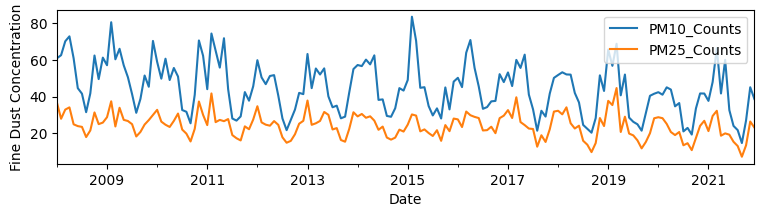

In [9]:
ax = (
    df.groupby(["year_month"])[["PM10_Counts", "PM25_Counts"]]
    .mean()
    .plot(figsize=(9, 2))
)
ax.set_ylabel("Fine Dust Concentration")
ax.set_xlabel("Date")
plt.show();

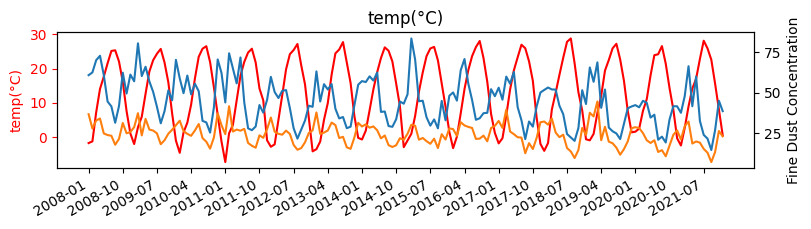

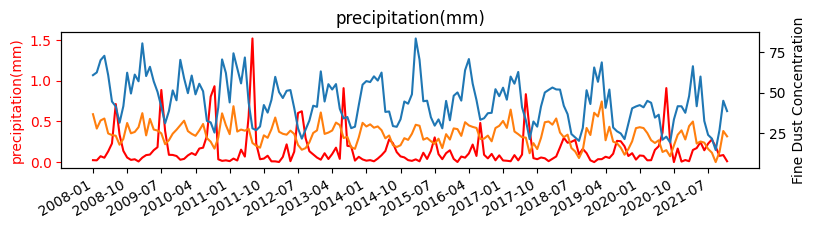

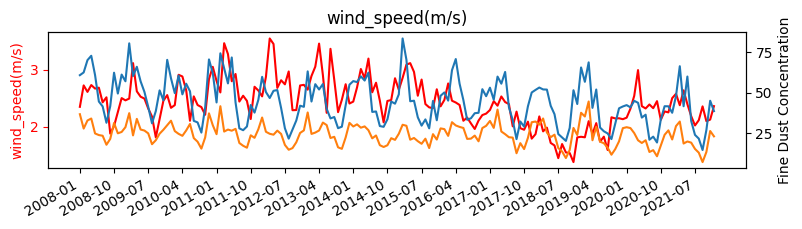

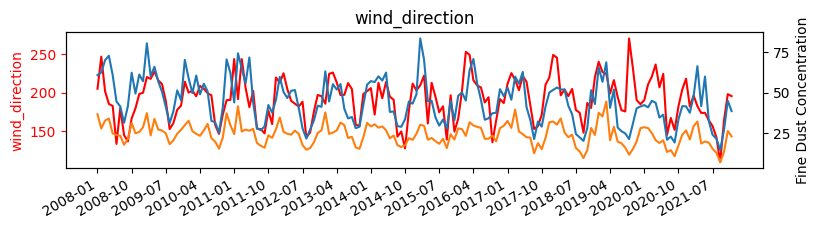

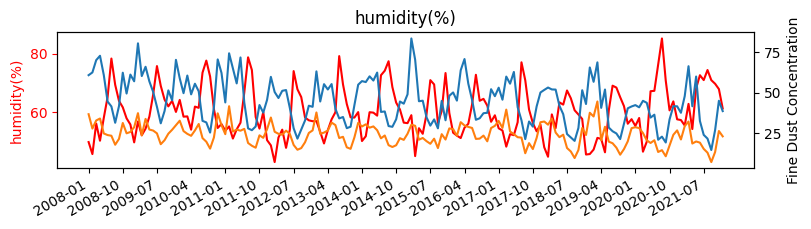

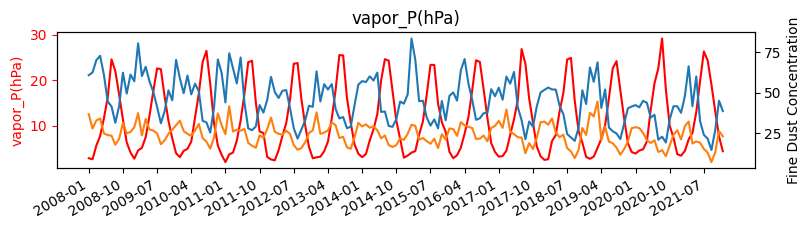

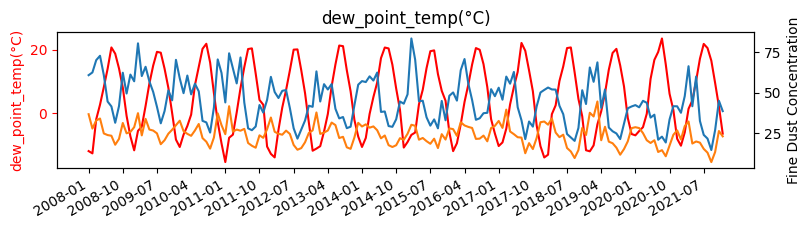

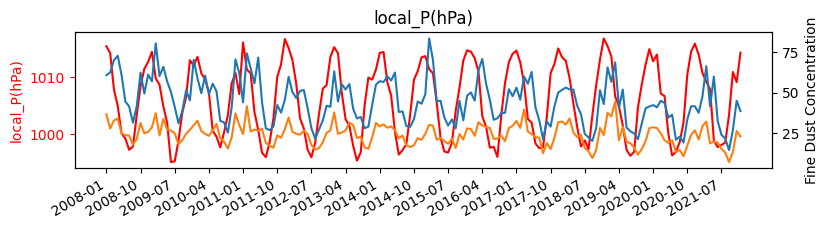

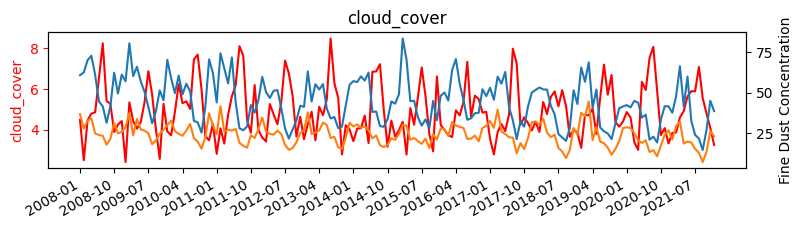

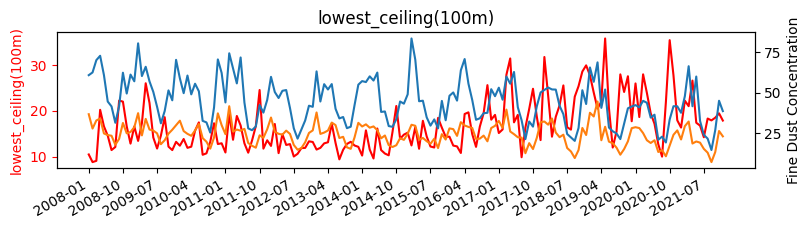

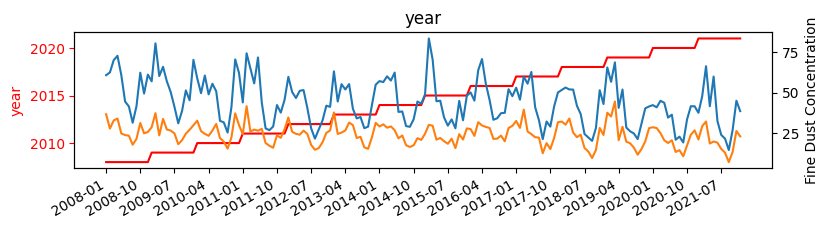

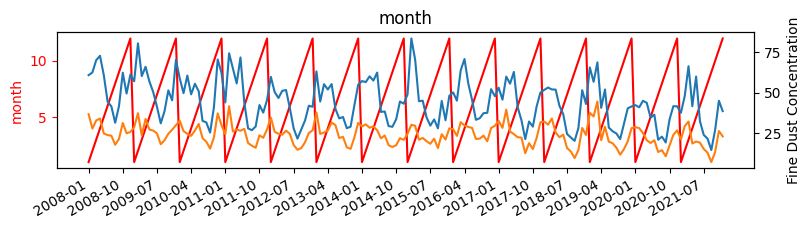

In [10]:
for col in df.columns[3:-2]:
    x = list(df["year_month"].unique().astype(str))
    y1 = df.groupby(["year_month"])[[f"{col}"]].mean()
    y2 = df.groupby(["year_month"])[["PM10_Counts", "PM25_Counts"]].mean()

    fig, ax1 = plt.subplots(figsize=(9, 2))

    ax2 = ax1.twinx()
    ax1.plot(x, y1, "r")
    ax2.plot(x, y2)
    ax1.set_ylabel(f"{col}")
    ax1.tick_params(axis="y", colors="red")
    ax1.yaxis.label.set_color("red")
    ax2.set_ylabel("Fine Dust Concentration")
    ax1.set_title(f"{col}")
    ax1.set_xticks(ax1.get_xticks()[::3])
    ax2.set_xticks(ax2.get_xticks()[::3])
    fig.autofmt_xdate()
    plt.show();

## 3.2. Annual

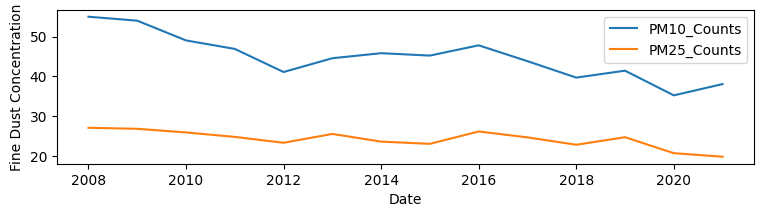

In [11]:
ax = df.groupby(["year"])[["PM10_Counts", "PM25_Counts"]].mean().plot(figsize=(9, 2))
ax.set_ylabel("Fine Dust Concentration")
ax.set_xlabel("Date")
plt.show();

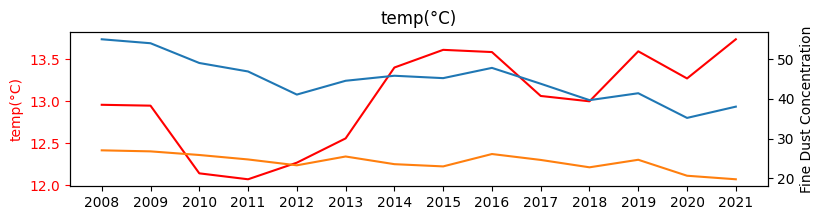

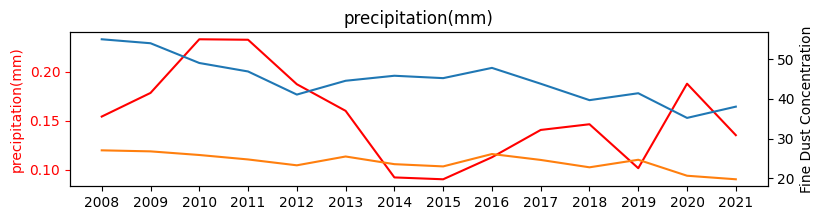

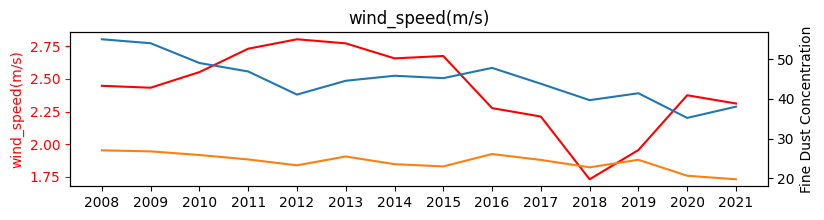

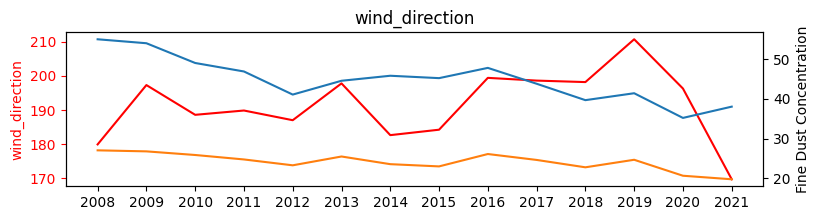

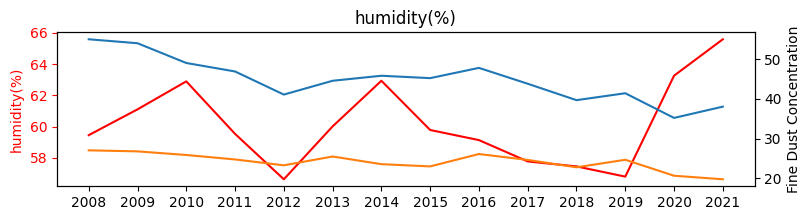

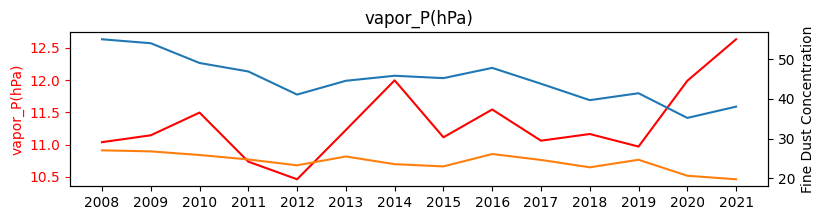

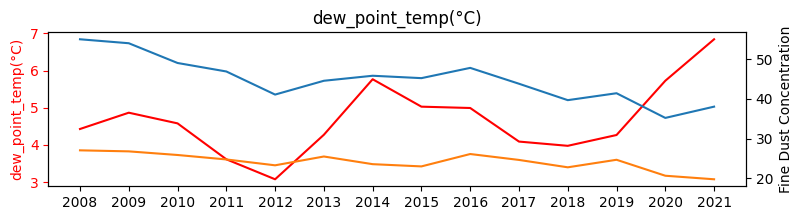

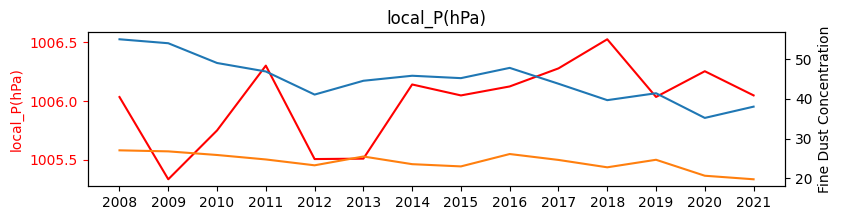

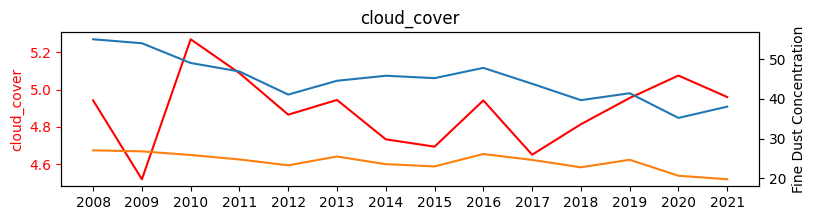

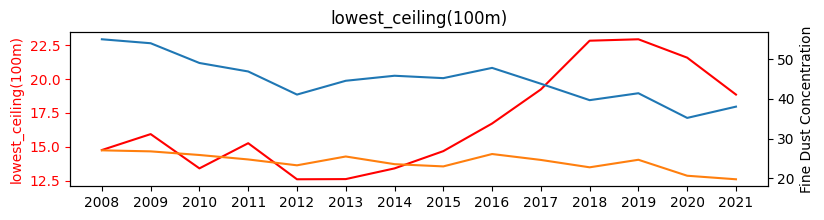

In [12]:
for col in df.columns[3:-4]:
    x = list(df["year"].unique().astype(str))
    y1 = df.groupby(["year"])[[f"{col}"]].mean()
    y2 = df.groupby(["year"])[["PM10_Counts", "PM25_Counts"]].mean()

    fig, ax1 = plt.subplots(figsize=(9, 2))

    ax2 = ax1.twinx()
    ax1.plot(x, y1, "r")
    ax2.plot(x, y2)
    ax1.set_ylabel(f"{col}")
    ax1.tick_params(axis="y", colors="red")
    ax1.yaxis.label.set_color("red")
    ax2.set_ylabel("Fine Dust Concentration")
    ax1.set_title(f"{col}")
    plt.show();

## 3.3. Monthly

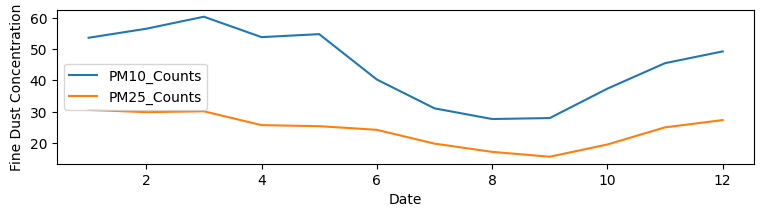

In [13]:
ax = df.groupby(["month"])[["PM10_Counts", "PM25_Counts"]].mean().plot(figsize=(9, 2))
ax.set_ylabel("Fine Dust Concentration")
ax.set_xlabel("Date")
plt.show();

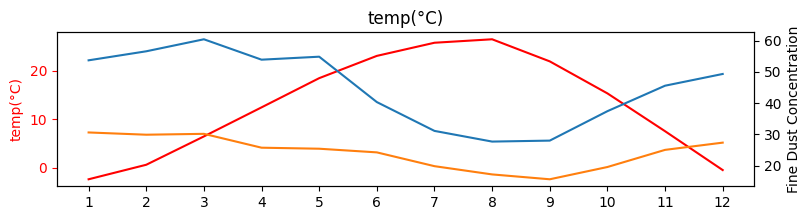

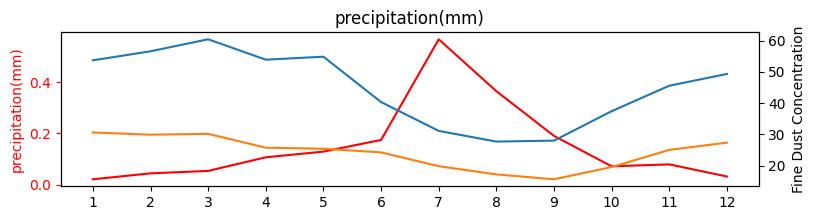

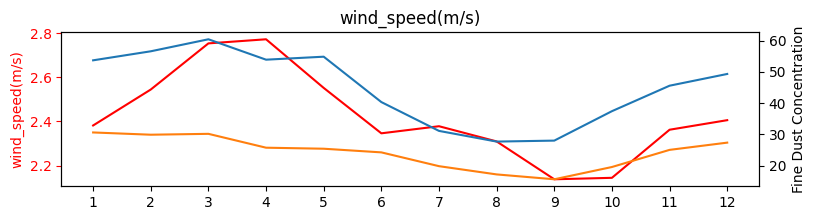

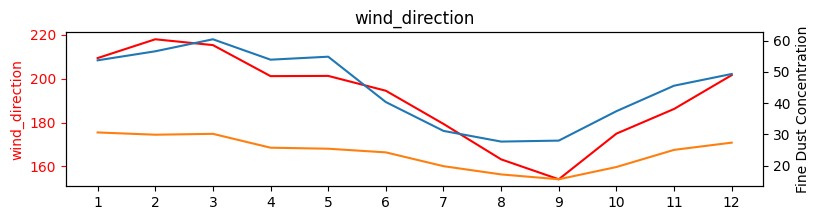

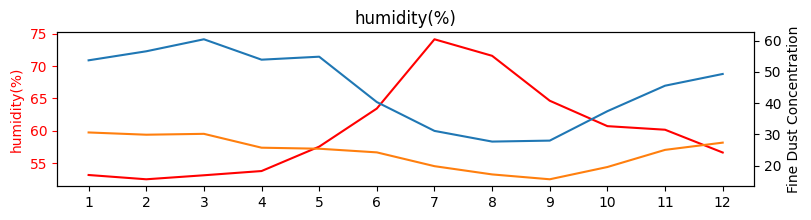

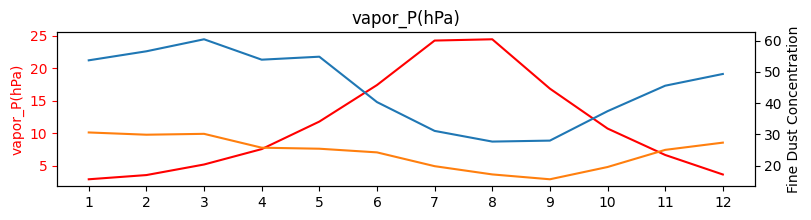

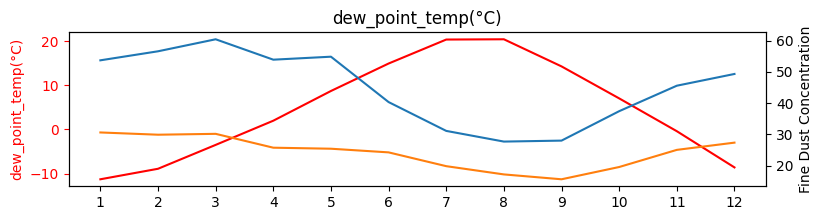

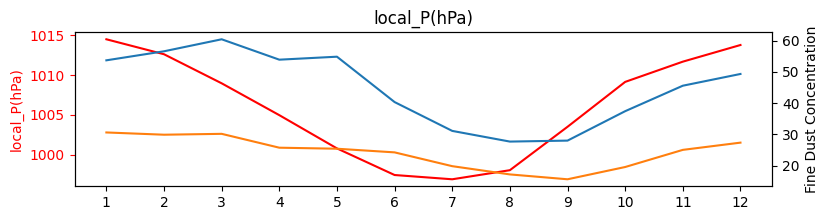

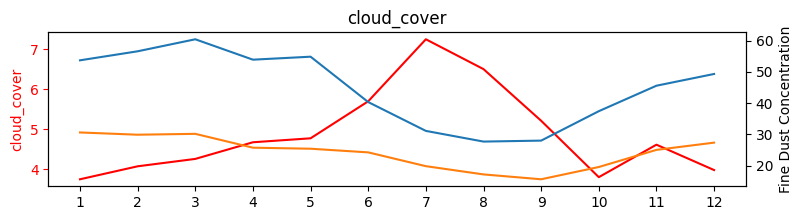

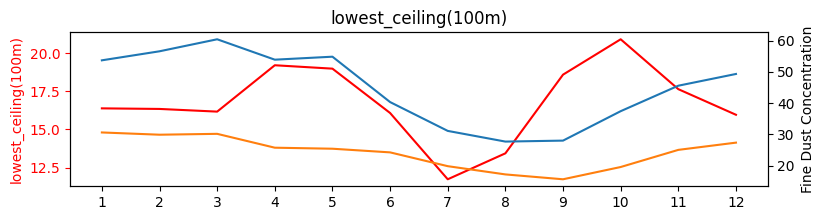

In [14]:
for col in df.columns[3:-4]:
    x = list(df["month"].unique().astype(str))
    y1 = df.groupby(["month"])[[f"{col}"]].mean()
    y2 = df.groupby(["month"])[["PM10_Counts", "PM25_Counts"]].mean()

    fig, ax1 = plt.subplots(figsize=(9, 2))

    ax2 = ax1.twinx()
    ax1.plot(x, y1, "r")
    ax2.plot(x, y2)
    ax1.set_ylabel(f"{col}")
    ax1.tick_params(axis="y", colors="red")
    ax1.yaxis.label.set_color("red")
    ax2.set_ylabel("Fine Dust Concentration")
    ax1.set_title(f"{col}")
    plt.show();

# 4. Multicollinearity Analysis

In [15]:
df.iloc[:, 3:-2].corr(method="pearson")

,temp(°C),precipitation(mm),wind_speed(m/s),wind_direction,humidity(%),vapor_P(hPa),dew_point_temp(°C),local_P(hPa),cloud_cover,lowest_ceiling(100m),year,month
temp(°C),1.000000,0.065754,-0.006130,-0.118895,0.173866,0.849139,0.902806,-0.739956,0.258321,-0.015209,0.032432,0.234096
precipitation(mm),0.065754,1.000000,0.042872,-0.045171,0.192565,0.151464,0.126381,-0.130604,0.148350,-0.085020,-0.015619,0.018834
wind_speed(m/s),-0.006130,0.042872,1.000000,0.249259,-0.216629,-0.084461,-0.104435,-0.116457,0.015571,-0.122667,-0.126899,-0.085412
wind_direction,-0.118895,-0.045171,0.249259,1.000000,-0.230219,-0.149439,-0.197127,0.045573,-0.164201,0.010518,0.014302,-0.109702
humidity(%),0.173866,0.192565,-0.216629,-0.230219,1.000000,0.542397,0.570787,-0.364237,0.422180,-0.274127,0.015126,0.160309
vapor_P(hPa),0.849139,0.151464,-0.084461,-0.149439,0.542397,1.000000,0.944602,-0.737834,0.373618,-0.162100,0.033833,0.239974
dew_point_temp(°C),0.902806,0.126381,-0.104435,-0.197127,0.570787,0.944602,1.000000,-0.765450,0.389274,-0.129073,0.033736,0.270904
local_P(hPa),-0.739956,-0.130604,-0.116457,0.045573,-0.364237,-0.737834,-0.765450,1.000000,-0.355154,0.166568,0.022079,-0.042237
cloud_cover,0.258321,0.148350,0.015571,-0.164201,0.422180,0.373618,0.389274,-0.355154,1.000000,-0.183056,0.001070,0.040131
lowest_ceiling(100m),-0.015209,-0.085020,-0.122667,0.010518,-0.274127,-0.162100,-0.129073,0.166568,-0.183056,1.000000,0.188927,0.013611


In [16]:
abs(df.iloc[:, 3:-2].corr(method="pearson")) > 0.75

,temp(°C),precipitation(mm),wind_speed(m/s),wind_direction,humidity(%),vapor_P(hPa),dew_point_temp(°C),local_P(hPa),cloud_cover,lowest_ceiling(100m),year,month
temp(°C),True,False,False,False,False,True,True,False,False,False,False,False
precipitation(mm),False,True,False,False,False,False,False,False,False,False,False,False
wind_speed(m/s),False,False,True,False,False,False,False,False,False,False,False,False
wind_direction,False,False,False,True,False,False,False,False,False,False,False,False
humidity(%),False,False,False,False,True,False,False,False,False,False,False,False
vapor_P(hPa),True,False,False,False,False,True,True,False,False,False,False,False
dew_point_temp(°C),True,False,False,False,False,True,True,True,False,False,False,False
local_P(hPa),False,False,False,False,False,False,True,True,False,False,False,False
cloud_cover,False,False,False,False,False,False,False,False,True,False,False,False
lowest_ceiling(100m),False,False,False,False,False,False,False,False,False,True,False,False


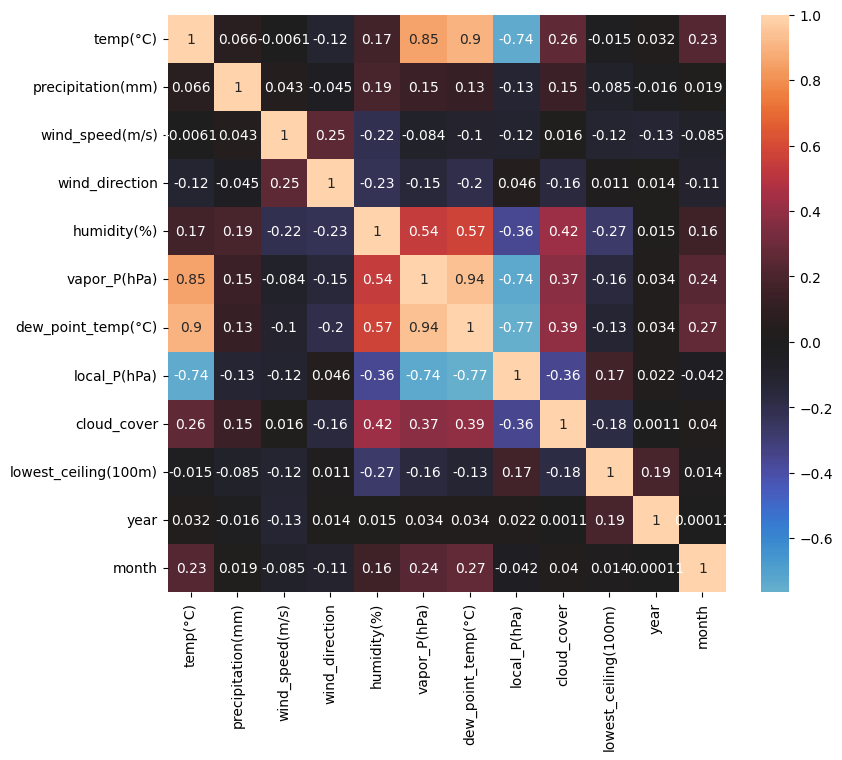

In [17]:
f, ax = plt.subplots(figsize=(9, 7.5))

sns.heatmap(df.iloc[:, 3:-2].corr(method="pearson"), center=0, annot=True);

# 5. Feature and Target Selection

In [18]:
df.columns

Index(['date', 'PM10_Counts', 'PM25_Counts', 'temp(°C)', 'precipitation(mm)',
       'wind_speed(m/s)', 'wind_direction', 'humidity(%)', 'vapor_P(hPa)',
       'dew_point_temp(°C)', 'local_P(hPa)', 'cloud_cover',
       'lowest_ceiling(100m)', 'year', 'month', 'day', 'year_month'],
      dtype='object')

In [19]:
# Feature candidates
features = [
    "temp(°C)",
    "precipitation(mm)",
    "wind_speed(m/s)",
    "wind_direction",
    "humidity(%)",
    "local_P(hPa)",
    "cloud_cover",
    "lowest_ceiling(100m)",
    "month",
]

In [20]:
targets = ["PM10_Counts", "PM25_Counts"]

# 6. Data Distribution Analysis

## 6.1. Data Distribution of Features

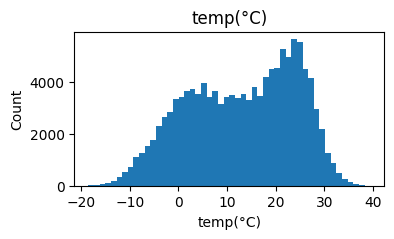

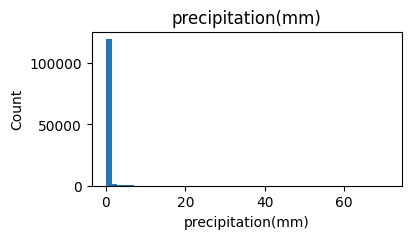

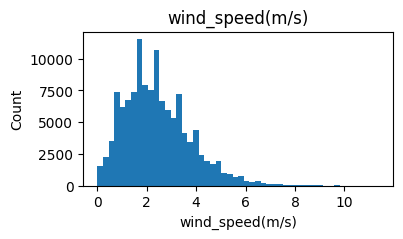

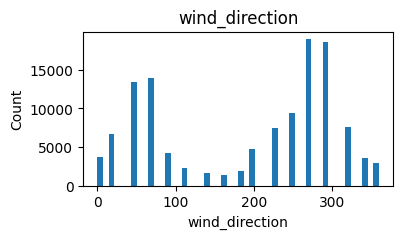

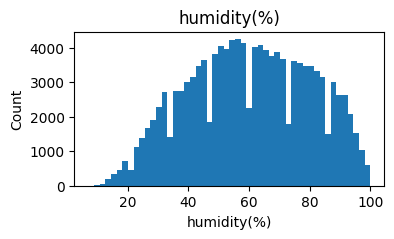

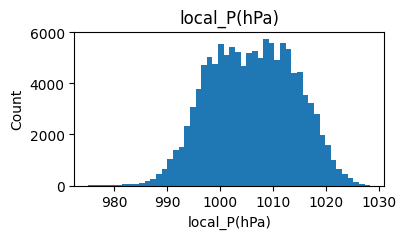

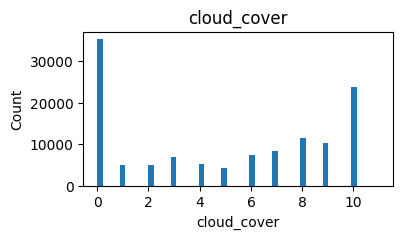

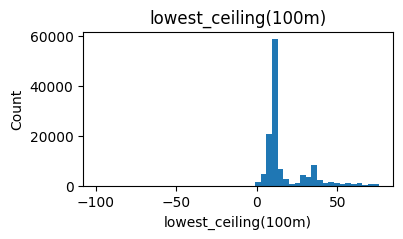

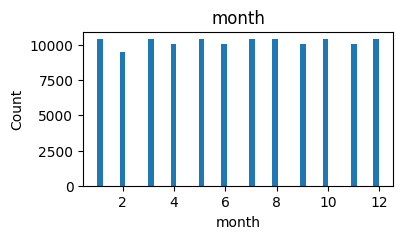

In [21]:
for feat in features:
    plt.figure(figsize=(4, 2))
    plt.hist(df[f"{feat}"], bins=50)
    plt.xlabel(f"{feat}")
    plt.ylabel("Count")
    plt.title(f"{feat}")
    plt.show();

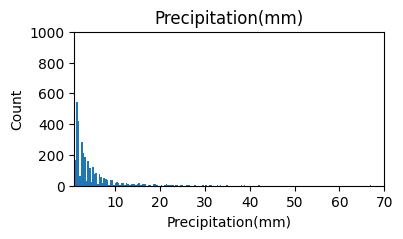

In [22]:
# Additional check on the distribution of precipitation

plt.figure(figsize=(4, 2))
plt.hist(df["precipitation(mm)"], bins=200)
plt.xlabel("Precipitation(mm)")
plt.xlim(1, 70)
plt.ylabel("Count")
plt.ylim(0, 1000)
plt.title("Precipitation(mm)")
plt.show();

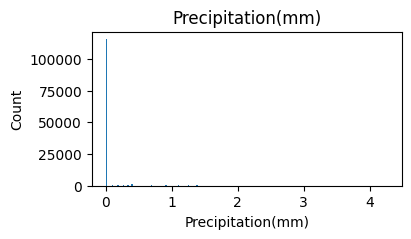

In [23]:
# Check on log-transformed precipitation

plt.figure(figsize=(4, 2))
plt.hist(np.log1p(df["precipitation(mm)"]), bins=200)
plt.xlabel("Precipitation(mm)")
plt.ylabel("Count")
plt.title("Precipitation(mm)")
plt.show();

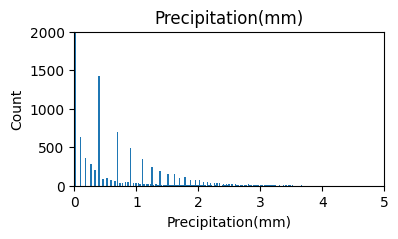

In [24]:
plt.figure(figsize=(4, 2))
plt.hist(np.log1p(df["precipitation(mm)"]), bins=200)
plt.xlabel("Precipitation(mm)")
plt.xlim(0, 5)
plt.ylabel("Count")
plt.ylim(0, 2000)
plt.title("Precipitation(mm)")
plt.show();

## 6.2. Data Distribution of Targets

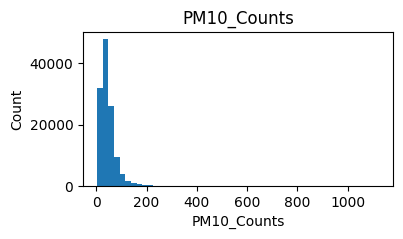

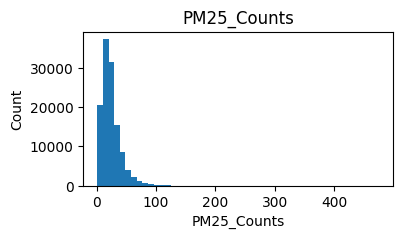

In [25]:
for target in targets:
    plt.figure(figsize=(4, 2))
    plt.hist(df[f"{target}"], bins=50)
    plt.xlabel(f"{target}")
    plt.ylabel("Count")
    plt.title(f"{target}")
    plt.show();

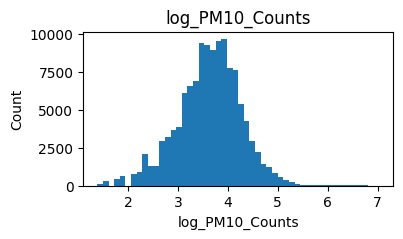

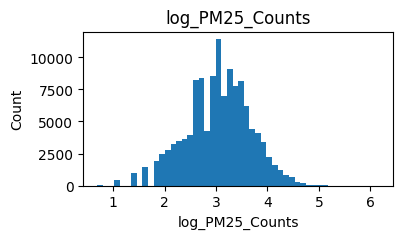

In [26]:
# After log-transformation of targets

for target in targets:
    plt.figure(figsize=(4, 2))
    plt.hist(np.log1p(df[f"{target}"]), bins=50)
    plt.xlabel(f"log_{target}")
    plt.ylabel("Count")
    plt.title(f"log_{target}")
    plt.show();

# 7. Data Preparation for Machine Learning

In [27]:
new_columns = ["date"] + features + targets

In [28]:
df_ml = df[new_columns]

In [29]:
df_ml.loc[:, "log_PM10_Counts"] = np.log(df.loc[:, "PM10_Counts"])
df_ml.loc[:, "log_PM25_Counts"] = np.log(df.loc[:, "PM25_Counts"])

In [30]:
df_ml.head(3)

,date,temp(°C),precipitation(mm),wind_speed(m/s),wind_direction,humidity(%),local_P(hPa),cloud_cover,lowest_ceiling(100m),month,PM10_Counts,PM25_Counts,log_PM10_Counts,log_PM25_Counts
0,2008-01-01 10:00:00,-7.6,0.0,4.6,340.0,47.0,1010.7,2.0,12.0,1,30.0,11.0,3.401197,2.397895
1,2008-01-01 11:00:00,-6.9,0.0,4.1,290.0,42.0,1010.7,2.0,12.0,1,29.0,13.0,3.367296,2.564949
2,2008-01-01 12:00:00,-5.8,0.0,4.1,290.0,42.0,1010.7,2.0,12.0,1,29.0,12.0,3.367296,2.484907


In [31]:
df_ml.to_csv(
    "../data/processed/seoul_fine_dust_weather_2008_2021_for_ml.csv", index=False
)